# Lab 3: Clustering 
Danny Chang<br>
Joey Hernandez <br>
Vo Nguyen


<hr>

## <center>1. Business Understanding</center>
The dataset (fictional) comprises scores from three tests of students at a public school, as well as personal and socio-economic factors that may have interaction effects. The purpose of collecting this data is to identify potential relationships between personal and socio-economic factors and test scores. By understanding which factors have the most significant impact on test scores, educators, parents, and students can focus their attention on variables that could potentially help students earn higher scores. This information can be used to inform educational policies and practices, as well as to develop targeted interventions to support students who may be struggling academically. Ultimately, the goal of collecting this data is to improve educational outcomes and promote academic success for all students.<br><br>
Student education and testing scores are critical to their future success. Education provides the foundation upon which students will build their future, and improving the efficiency of learning and testing experiences can have a positive impact on many students' futures. By analyzing the dataset, we can identify factors that influence student performance and develop strategies to improve academic outcomes.<br><br>
Our metric of success in the data mining process can be assessed with whether or not we are able to uncover patterns and/or significant relationships that help us to better understand student performance factors. This could include identifying significant predictors of test scores, understanding the impact of certain attributes on student scores, etc. By evaluating the results of our analyses in light of the original research questions, we can determine whether we have gained useful insights from our data mining process which can inform educational policies and practices and promote academic success for all students.<br><br>
To measure the effectiveness of a good prediction algorithm, we need to evaluate its accuracy in predicting test scores and its interpretability in identifying the factors that influence those scores. Accuracy can be measured using standard metrics such as mean squared error or root mean squared error, which compare the predicted test scores to the actual scores. However, accuracy alone is not sufficient to evaluate the effectiveness of a prediction algorithm. We also need to consider the interpretability of the results, which requires us to examine the relationship between the input variables and the predicted test scores.

***

## <center>2. Data Understanding</center>

Our team will be performing exploratory data analysis with an emphasis on visualization and data processing using the dataset found on [Kaggle](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores). The EDA will consist of statistical summaries of attributes, visualizing attributes, and providing interpretations and conclusions based on the visualization and data processing.

###  Missing Values At A Glance
  
  - The data set contained many missing values at first glance. Upon further investigation, we found that many columns of data contain "nan".<br><br>    
   - The nan values are only in categorical variables and could likely be attributed to not having an answer that fits within the given responses. It's hard to determine this since we have no information on how each response was gathered, and from who/how it was gathered.<br><br>      
   - The missing data will of course be handled on a case by case basis, but we will evaluate the missing values to uncover potential reasons that will aid us in understanding how to handle the NANs.<br><br>
   - In total NAN makes up 37.2% of the data in our dataframe.

### Handling Missing Values 
   
   After investigation of our data and under the assumption that our data are missing completely at random, there are a number of ways for us to proceed:
   1) Discard observations with any missing values
   2) Relying on a learning algorithm to deal with missing values in the training phase
   3) Impute all missing values before training. 

**The 2 options discussed for our group:**


Option 1 would effectively remove 37.2% of the observations in our data frame. This is quite a substantial loss of information and was ultimately decided against. 

Option 3 (imputation). This option seems to make sense given that the data appear to be MCAR, it will allow us to keep the 37% of our data effectively preserving our sample size, and it will help us to maintain more statistical power and precision. It should however be noted that while data imputation is very useful in handling missing values some tradeoffs and consideration are to be had such as: 
 - Potential Bias
 - Assumption reliance
 - Loss of Variability
 - Uncertainty estimation

### Addressing Duplicates

There are no duplicated rows or columns in the data. While there may be certain values (such as scores) which are "duplicated" this is to be expected.

### Histogram of Scores

To see the overall distribution and outliers of our data we created histograms for the test score variables. Additionally, so that we can make efficient use of our plots, we have overlaid the median score on the histograms so that we can see where that lies within the distribution for each of the test scores.

We chose the median because we found that the data is skewed; therefore, the median is the more appropriate way method.

# <center>3. Modeling and Evaluation</center>

## Data Transformations

In [1]:
import pandas as pd
df = pd.read_csv('cleandf.csv')

In [2]:
df_dummy = pd.get_dummies(df, columns=['Gender','LunchType','TestPrep','IsFirstChild',
                                      'TransportMeans','ParentEduc',
                                      'EthnicGroup','ParentMaritalStatus'], drop_first = True)

df_dummy['WklyStudyHours'] = [1 if x == '> 10' else 0 for x in df_dummy['WklyStudyHours']]
df_dummy['PracticeSport'] = [0 if x == 'never' else 1 for x in df_dummy['PracticeSport']]

math_df = df_dummy.drop(['ReadingResult','WritingResult', 'MathScore'], axis = 1)

In [3]:
data = math_df.drop('NrSiblings',axis = 1)

## Data Scaling

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract the explanatory variables from the dataset
explanatory_variables = data[['ReadingScore', 'WritingScore', 'Gender_male', 'LunchType_standard']]

# Extract the dummy variables 'Gender_male' and 'LunchType_standard' before scaling
dummy_variables = explanatory_variables[['Gender_male', 'LunchType_standard']]
explanatory_variables = explanatory_variables.drop(columns=['Gender_male', 'LunchType_standard'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the explanatory variables and transform them
scaled_explanatory_variables = scaler.fit_transform(explanatory_variables)

# Re-insert the dummy variables 'Gender_male' and 'LunchType_standard' into the scaled explanatory variables
scaled_explanatory_variables = pd.DataFrame(scaled_explanatory_variables, columns=['ReadingScore', 'WritingScore'])
scaled_explanatory_variables[['Gender_male', 'LunchType_standard']] = dummy_variables

<hr>

## Cluster Num Selection

<hr>

## Silhouette Score
- The Silhouette score measures how well-separated the clusters are. It quantifies both the cohesion (simiarity between points in the cluster) and the separation (how distinct the clusters are from each other). 
- Scores range from -1 to +1, where the higher values indicate better-defined clusters.

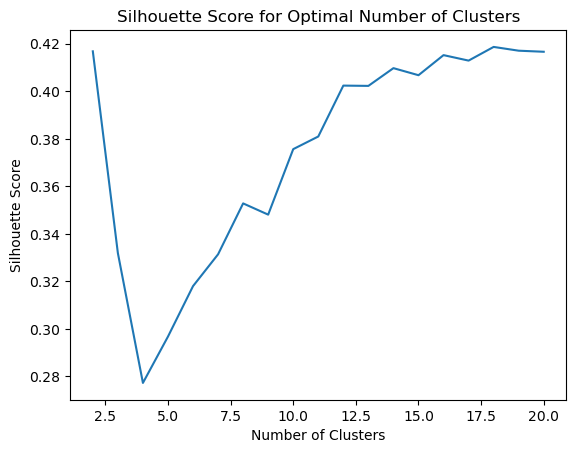

In [5]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for num_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
    cluster_assignments = kmeans.fit_predict(scaled_explanatory_variables)
    silhouette_scores.append(silhouette_score(scaled_explanatory_variables, cluster_assignments))

# Plot the silhouette scores
plt.plot(range(2, 21), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

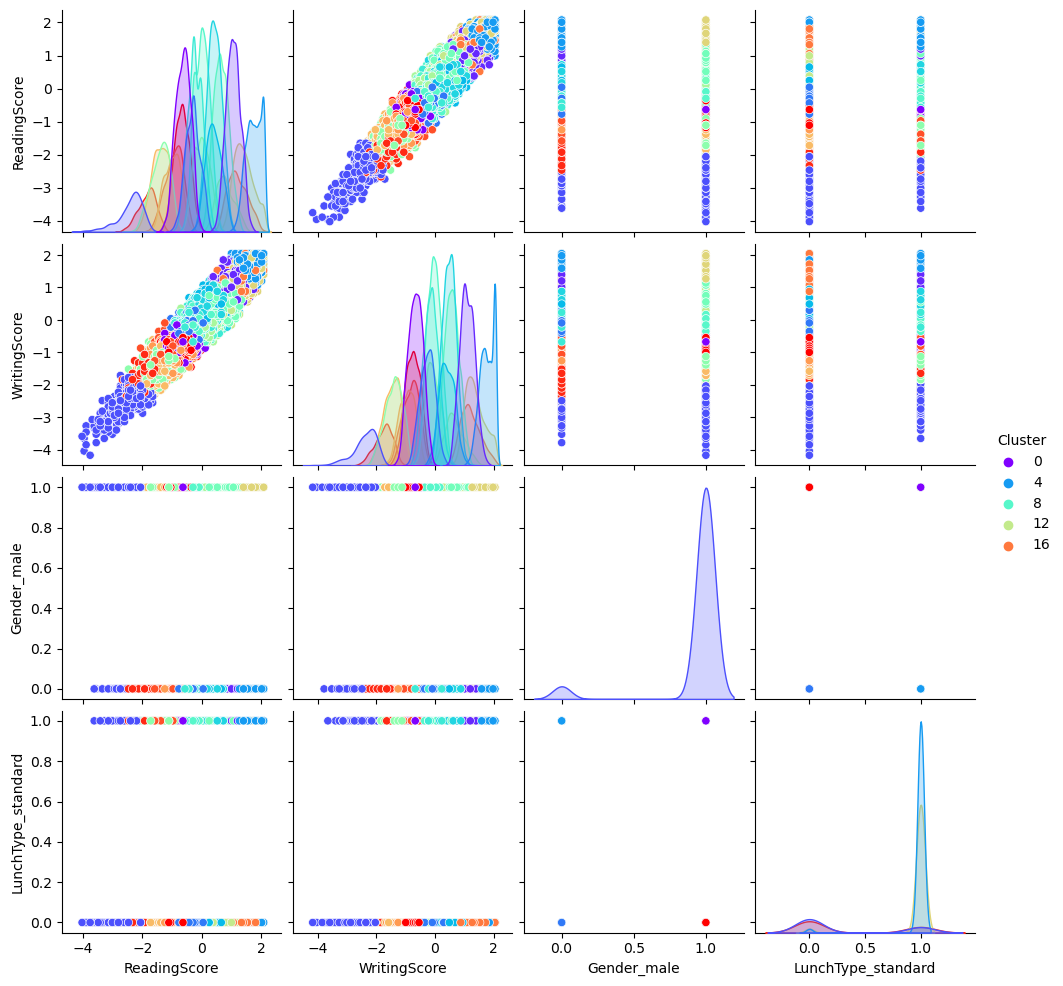

In [6]:
import seaborn as sns

# Add the cluster assignments to the DataFrame
scaled_explanatory_variables['Cluster'] = cluster_assignments

# Create pair plots with hue set to the cluster assignments
sns.pairplot(scaled_explanatory_variables, hue='Cluster', palette='rainbow')
plt.show()

<hr>

# Cluster Analysis - KMeans

In [27]:
# Specify the number of clusters you want to identify
num_clusters = 2

# Initialize the KMeans clustering algorithm
kmeans = KMeans(n_clusters=num_clusters,
                n_init=10,
                random_state=42)

# Fit the algorithm to the scaled explanatory variables and obtain the cluster assignments
cluster_assignments = kmeans.fit_predict(scaled_explanatory_variables)

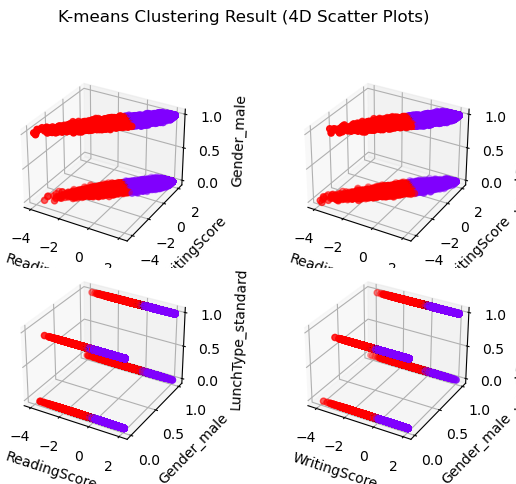

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

# Create subplots for 3D scatter plots
ax1 = fig.add_subplot(221, projection='3d')  # ReadingScore, WritingScore, Gender_male
ax2 = fig.add_subplot(222, projection='3d')  # ReadingScore, WritingScore, LunchType_standard
ax3 = fig.add_subplot(223, projection='3d')  # ReadingScore, Gender_male, LunchType_standard
ax4 = fig.add_subplot(224, projection='3d')  # WritingScore, Gender_male, LunchType_standard

# Plot the data points in 3D with colors representing cluster assignments
ax1.scatter(scaled_explanatory_variables['ReadingScore'],
            scaled_explanatory_variables['WritingScore'],
            scaled_explanatory_variables['Gender_male'],
            c=cluster_assignments, cmap='rainbow')
ax1.set_xlabel('ReadingScore')
ax1.set_ylabel('WritingScore')
ax1.set_zlabel('Gender_male')

ax2.scatter(scaled_explanatory_variables['ReadingScore'],
            scaled_explanatory_variables['WritingScore'],
            scaled_explanatory_variables['LunchType_standard'],
            c=cluster_assignments, cmap='rainbow')
ax2.set_xlabel('ReadingScore')
ax2.set_ylabel('WritingScore')
ax2.set_zlabel('LunchType_standard')

ax3.scatter(scaled_explanatory_variables['ReadingScore'],
            scaled_explanatory_variables['Gender_male'],
            scaled_explanatory_variables['LunchType_standard'],
            c=cluster_assignments, cmap='rainbow')
ax3.set_xlabel('ReadingScore')
ax3.set_ylabel('Gender_male')
ax3.set_zlabel('LunchType_standard')

ax4.scatter(scaled_explanatory_variables['WritingScore'],
            scaled_explanatory_variables['Gender_male'],
            scaled_explanatory_variables['LunchType_standard'],
            c=cluster_assignments, cmap='rainbow')
ax4.set_xlabel('WritingScore')
ax4.set_ylabel('Gender_male')
ax4.set_zlabel('LunchType_standard')

plt.suptitle('K-means Clustering Result (4D Scatter Plots)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [29]:
# Extract the 'MathResult' column from the original data
ground_truth_labels = data['MathResult']

# Convert the categorical labels to numerical format
ground_truth_labels = ground_truth_labels.map({'Fail': 0, 'Pass': 1})

In [31]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

davies_bouldin_index_model = davies_bouldin_score(scaled_explanatory_variables, cluster_assignments)
silhouette_score_kmeans = silhouette_score(scaled_explanatory_variables, cluster_assignments)

ari_kmeans = adjusted_rand_score(ground_truth_labels, cluster_assignments)

print('Davies Bouldin Index (K-Means):', davies_bouldin_index_model)
print("Silhouette Score (K-Means):", silhouette_score_kmeans)
print("Adjusted Rand Index (K-Means):", ari_kmeans)

Davies Bouldin Index (K-Means): 0.8917497251329636
Silhouette Score (K-Means): 0.4168174509677683
Adjusted Rand Index (K-Means): 0.34044410406051084


<hr>

# Cluster Analysis - DBSCAN

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize the DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the algorithm to the scaled explanatory variables and obtain the cluster assignments
cluster_assignments = dbscan.fit_predict(scaled_explanatory_variables)

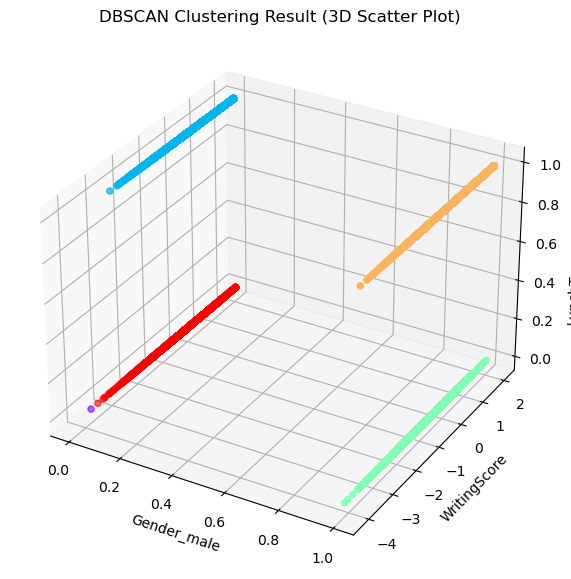

In [46]:
# Visualize the DBSCAN clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['Gender_male'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['LunchType_standard'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('Gender_male')
ax.set_ylabel('WritingScore')
ax.set_zlabel('LunchType_standard')
ax.set_title('DBSCAN Clustering Result (3D Scatter Plot)')
plt.show()

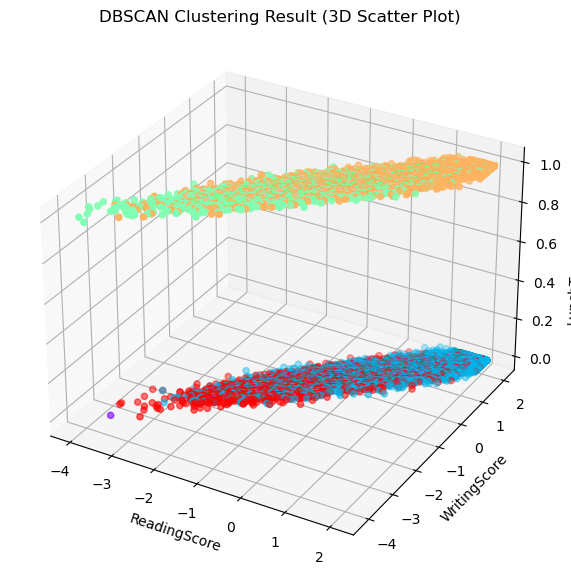

In [47]:
# Visualize the DBSCAN clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['ReadingScore'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['Gender_male'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('ReadingScore')
ax.set_ylabel('WritingScore')
ax.set_zlabel('LunchType_standard')
ax.set_title('DBSCAN Clustering Result (3D Scatter Plot)')
plt.show()

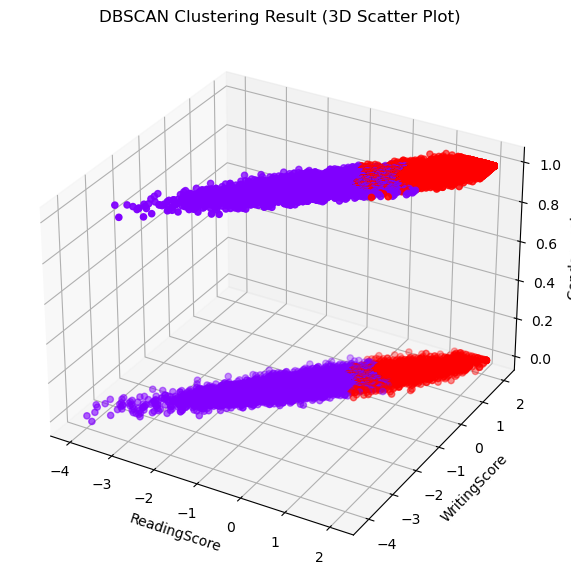

In [44]:
# Visualize the DBSCAN clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['ReadingScore'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['LunchType_standard'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('ReadingScore')
ax.set_ylabel('WritingScore')
ax.set_zlabel('Gender_male')
ax.set_title('DBSCAN Clustering Result (3D Scatter Plot)')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

davies_bouldin_index_model = davies_bouldin_score(scaled_explanatory_variables, cluster_assignments)
silhouette_score_kmeans = silhouette_score(scaled_explanatory_variables, cluster_assignments)

ari_kmeans = adjusted_rand_score(ground_truth_labels, cluster_assignments)

print('Davies Bouldin Index (DBSCAN):', davies_bouldin_index_model)
print("Silhouette Score (DBSCAN):", silhouette_score_kmeans)
print("Adjusted Rand Index (DBSCAN):", ari_kmeans)

Davies Bouldin Index (DBSCAN): 1.4409955838939505
Silhouette Score (DBSCAN): 0.17296185587131116
Adjusted Rand Index (DBSCAN): 0.035639733140200816


# Cluster Analysis - Agglomerative Clustering

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the number of clusters you want to identify
num_clusters = 2

# Initialize the AgglomerativeClustering algorithm
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the algorithm to the scaled explanatory variables and obtain the cluster assignments
cluster_assignments = agglomerative.fit_predict(scaled_explanatory_variables)

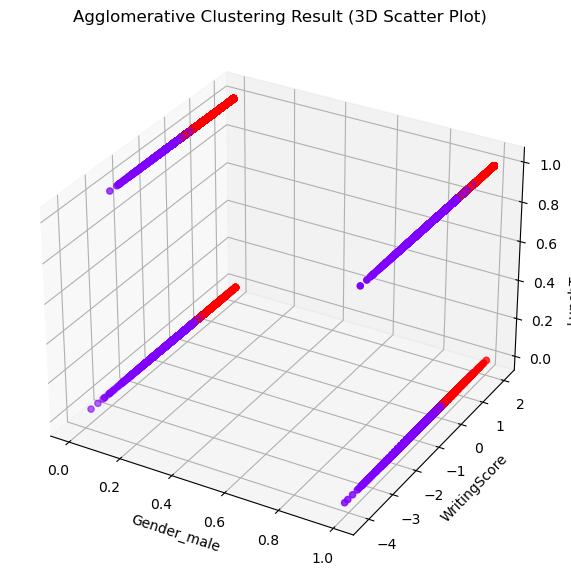

In [39]:
# Visualize the Agglomerative Clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['Gender_male'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['LunchType_standard'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('Gender_male')
ax.set_ylabel('WritingScore')
ax.set_zlabel('LunchType_standard')
ax.set_title('Agglomerative Clustering Result (3D Scatter Plot)')
plt.show()

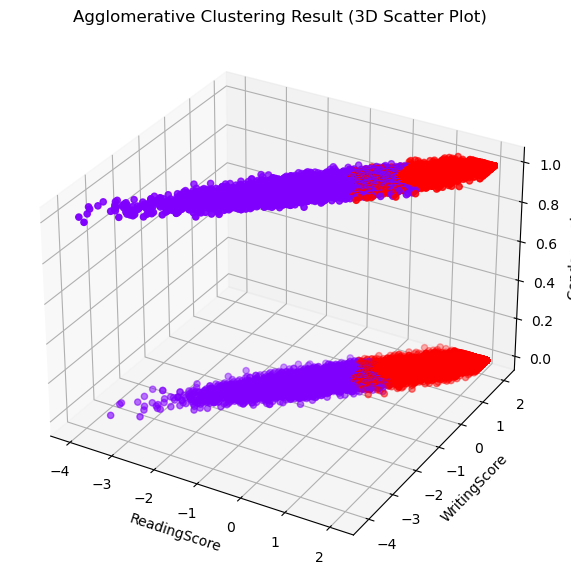

In [40]:
# Visualize the Agglomerative Clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['ReadingScore'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['Gender_male'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('ReadingScore')
ax.set_ylabel('WritingScore')
ax.set_zlabel('Gender_male')
ax.set_title('Agglomerative Clustering Result (3D Scatter Plot)')
plt.show()

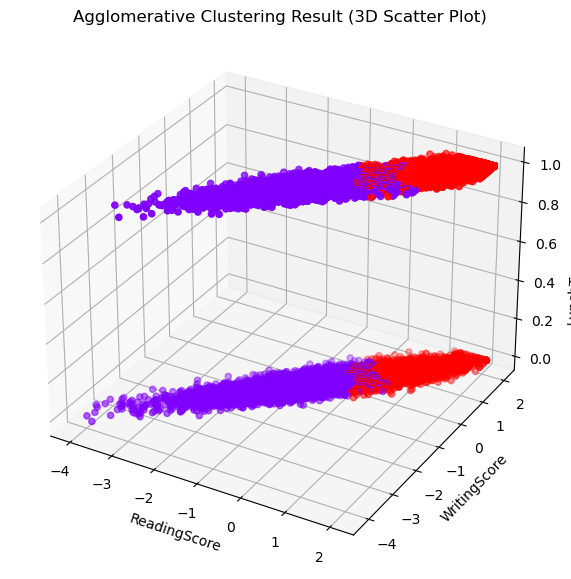

In [41]:
# Visualize the Agglomerative Clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['ReadingScore'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['LunchType_standard'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('ReadingScore')
ax.set_ylabel('WritingScore')
ax.set_zlabel('LunchType_standard')
ax.set_title('Agglomerative Clustering Result (3D Scatter Plot)')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

davies_bouldin_index_model = davies_bouldin_score(scaled_explanatory_variables, cluster_assignments)
silhouette_score_kmeans = silhouette_score(scaled_explanatory_variables, cluster_assignments)

ari_kmeans = adjusted_rand_score(ground_truth_labels, cluster_assignments)

print('Davies Bouldin Index (Agglomerative):', davies_bouldin_index_model)
print("Silhouette Score (Agglomerative):", silhouette_score_kmeans)
print("Adjusted Rand Index (Agglomerative):", ari_kmeans)

Davies Bouldin Index (Agglomerative): 0.9383041442988599
Silhouette Score (Agglomerative): 0.37066452462311233
Adjusted Rand Index (Agglomerative): 0.2660475093431273


<hr>

# Results

Objective:
The primary objective of this analysis was to explore the clustering algorithms to visualize relationships that may help with classification of test scores at a public school. Through this, we aimed to provide insights that could guide educators, parents, and policymakers in making informed decisions to foster academic success.

Significance of the Study:
Education and testing scores set the stage for a student's future endeavors. Identifying variables that contribute to academic outcomes allows for the refinement of learning experiences, ultimately benefiting a student's future trajectory. The success of our study is based on our ability to discern significant patterns and relationships that elucidate factors affecting student performance.

Methodology:

    Exploratory Data Analysis (EDA): The dataset, sourced from Kaggle, was thoroughly inspected through statistical summaries, attribute visualization, and interpretations from these visualizations.

    Handling Missing Values: The dataset initially presented with 37.2% missing values (labeled as "nan"). Given the assumption that data were missing completely at random, the decision was made to impute these missing values. This preserves our sample size, allowing for more robust statistical conclusions. However, it's worth noting that imputation can come with trade-offs including potential bias and reliance on certain assumptions.

    Addressing Duplicates: No duplicate rows or columns were found. Repeated scores were noted but deemed typical and not indicative of duplications.

    Score Distribution: Histograms were plotted to view the distribution of test scores. The median score was overlaid to account for the skewness of the data.

    Clustering: Various clustering algorithms were employed, namely DBSCAN, Agglomerative Clustering, and K-Means.

Key Findings:

    Missing Data: The significant proportion of missing values could likely stem from the absence of appropriate response categories, though the specifics of data collection remain unclear. Imputation was chosen to preserve data integrity and sample size.

    Score Distribution: Skewness in the test scores was observed, making the median a more fitting representative than the mean.

    Clustering Evaluation Metrics:
        DBSCAN had scores indicating relatively poorly defined clusters, with interesting patterns emerging when gender and lunch type were incorporated.
        Agglomerative clustering demonstrated reasonably defined clusters but not as distinct as K-Means.
        K-Means emerged as the most promising clustering method, with the best silhouette score and clearly defined visual separations between clusters.

Recommendations & Future Steps:

    Further Exploration of Missing Data: While imputation has its merits, future studies might benefit from digging deeper into the reasons behind missing data, potentially unveiling additional insights or suggesting alternative data collection methods.

    Cluster Analysis: Given the superior performance of K-Means, this clustering algorithm is recommended for future studies in similar contexts.

    Factor Analysis: The observed patterns with gender and lunch type in the DBSCAN model suggest potential avenues for further exploration on how these factors specifically impact test scores.

Concluding Remarks:
This analysis provided a detailed exploration of the factors influencing student test scores. With the insights gained, educators and policymakers are better equipped to design interventions and strategies to elevate student performance. As always, the pursuit of improved academic outcomes is a journey, and the insights from this study offer a valuable step in the right direction.

# Exceptional Work

In our data analysis journey, our team ventured into an advanced modeling approach that goes beyond traditional supervised learning models. This approach integrated unsupervised learning (clustering) into a supervised learning framework, K-Nearest Neighbors (KNN).

The Rationale:
The objective behind this hybrid strategy was to encapsulate inherent structures or groups within the dataset that might not be immediately discernible or directly related to the target variable through traditional modeling. By adding cluster_assignments as a feature in our model, we aimed to introduce a latent variable that captured potential nuances in the data. This could theoretically enhance the predictive power of our model, making it sensitive to subtle patterns that might be overseen in standard procedures.

The process began with a KMeans clustering algorithm, which partitioned the data into distinct clusters based on selected features. This cluster assignment, representative of inherent data structures, was then used as a new feature in our KNN classifier. The hope was that the introduction of this cluster-based feature would bolster the model's understanding of the data.
Results & Reflection:

Upon evaluating the performance of this advanced model, it was observed that the results were congruent with those of our initial model. However, a notable advantage was observed: the enhanced model, despite maintaining comparable performance metrics, utilized one fewer feature than the original. This is a promising result in the context of model simplicity and efficiency. Reducing the dimensionality of a model without compromising its efficacy is beneficial as it often leads to faster computations and easier interpretations.

In conclusion, while the benefits of this hybrid approach in this particular dataset were subtle, the methodology introduces a potential blueprint for improving model efficiency in other complex datasets. It showcases the value of integrating unsupervised learning within traditional supervised frameworks, a testament to the multidimensional nature of data science and the continuous pursuit of innovation.

Grid Search Results
Parameters: {'n_neighbors': 2} | Mean Accuracy: 0.823471776517664
Parameters: {'n_neighbors': 3} | Mean Accuracy: 0.8529747131622253
Parameters: {'n_neighbors': 5} | Mean Accuracy: 0.8604809903012132
Parameters: {'n_neighbors': 7} | Mean Accuracy: 0.8611664753917834
Parameters: {'n_neighbors': 9} | Mean Accuracy: 0.8642342966089818
Parameters: {'n_neighbors': 11} | Mean Accuracy: 0.8661924253016201
Parameters: {'n_neighbors': 13} | Mean Accuracy: 0.8673019953506145
Parameters: {'n_neighbors': 15} | Mean Accuracy: 0.8697823119297163
Parameters: {'n_neighbors': 19} | Mean Accuracy: 0.8697170377782804
KNeighborsClassifier(n_neighbors=15)
Cross-Validation Score: [0.86818923 0.87108355 0.87043081 0.87369452 0.8616188  0.87467363
 0.86977807 0.8694517  0.87565274 0.86129243]
Confusion Matrix [[15220  2040]
 [ 1956 11425]]


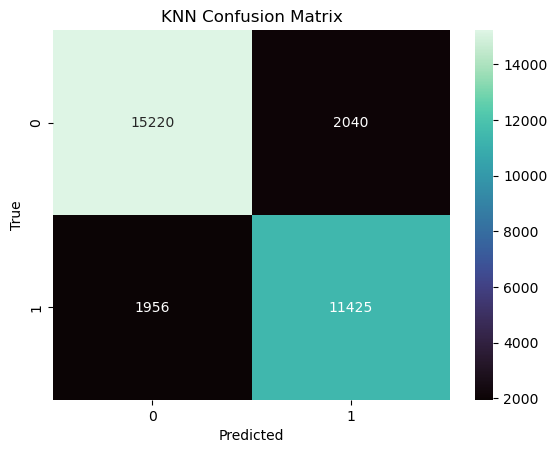

In [7]:
scaled_explanatory_variables['Cluster'] = cluster_assignments

# Define the target variable
y = data['MathResult']

# KNN Model Integration with Clustering Results
# ---------------------------------------------

X_with_clusters = scaled_explanatory_variables

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[2,3,5,7,9,11,13,15,19]}
grid_search = GridSearchCV(knn, param_grid, cv = 5)
grid_search.fit(X_with_clusters, y)
grid_search_results = grid_search.cv_results_

print('Grid Search Results')
for mean_score, params in zip(grid_search_results['mean_test_score'], grid_search_results['params']):
    print(f'Parameters: {params} | Mean Accuracy: {mean_score}')
best_knn = grid_search.best_estimator_
print(best_knn)

# Evaluate using cross-validation
cross_val_scores = cross_val_score(best_knn, X_with_clusters, y, cv=10)
print('Cross-Validation Score:',cross_val_scores)

# Predict using cross-validation
y_pred = cross_val_predict(best_knn, X_with_clusters, y, cv=10)
confusion_mat = confusion_matrix(y, y_pred)
print('Confusion Matrix', confusion_mat)

# Plot the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt = 'd', cmap = 'mako')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()


In [8]:
TP = 11425 
FP = 2040
FN = 1956
TN = 15220

accuracy = (TP + TN)/ (TP + TN + FP + FN)
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall)/ (precision + recall)

print('Accuracy', accuracy *100 ,'\n')
print('Sensitivity', sensitivity*100,'\n')
print('Specificity', specificity*100,'\n')
print('Precision', precision*100,'\n')
print('Recall', recall*100,'\n')
print('F1 - Score', f1_score*100,'\n')

Accuracy 86.95865017460265 

Sensitivity 85.3822584261266 

Specificity 88.18076477404404 

Precision 84.84961010025994 

Recall 85.3822584261266 

F1 - Score 85.11510094613723 

